In [1]:
import pandas as pd
from scipy.stats import (mannwhitneyu, wilcoxon)
import matplotlib.pyplot as plt
import numpy as np
import json

DATASET_NAME = "xsum" # ["cochrane","medeasi","asset","xsum","cnn"]
MODEL_NAME = "trained" 
SUFFIX = "_finetune"
LOGITS_PATH = f"logits/{DATASET_NAME}_{MODEL_NAME}_logits.pt"

df = pd.read_csv(f"experiment_{DATASET_NAME}_{MODEL_NAME}{SUFFIX}.csv")
# df = df.drop("nli_flag_gpt_label", axis=1)

meets_cutoff = df.nll_mean <= np.percentile(df.nll_mean.values, 80)

/tmp/ipykernel_2601085/2895216701.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"experiment_{DATASET_NAME}_{MODEL_NAME}{SUFFIX}.csv")


In [2]:
df.loc[df.nli_flag_gpt_label=="No", "nli_flag_gpt_label"]  = 1
df.loc[df.nli_flag_gpt_label=="Yes", "nli_flag_gpt_label"] = -1

In [3]:
dataset = json.load(open(f'../data/{DATASET_NAME}.json',"r"))

In [56]:
dataset["train"] = [dataset["train"][idx] for idx in range(len(dataset["train"])) if meets_cutoff[idx]]

In [ ]:
len(dataset["train"])

1117

In [ ]:
# for idx in range(len(dataset["train"])):
#     dataset["train"][idx]["meets_cutoff"] = str(meets_cutoff[idx])

In [ ]:
# def write_json(output_json, path):
#     json_object = json.dumps(output_json, indent=4)
#     with open(path, "w") as outfile:
#         outfile.write(json_object)

In [ ]:
# write_json(dataset, f"../data/{DATASET_NAME}_80pct.json")
# write_json(dataset, f"../data/{DATASET_NAME}_80pct_multiple.json")

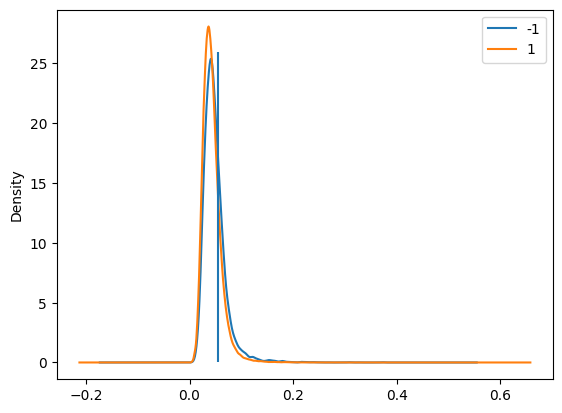

In [4]:
df.groupby("nli_flag_ent_label")['nll_mean'].plot.density()
plt.vlines(x=np.percentile(df.nll_mean.values, 80), ymin=0, ymax=26)
plt.legend()
# plt.xlim(-0.1, 0.3)

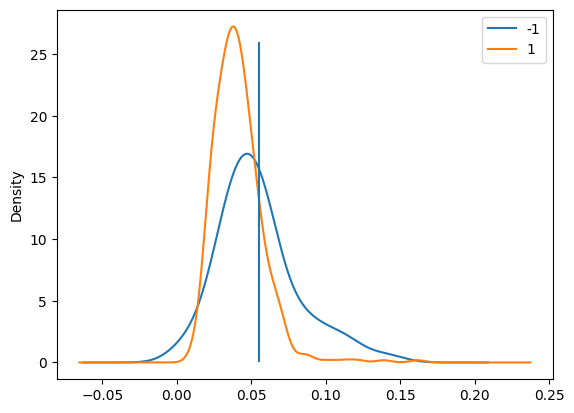

In [6]:
df.loc[:499].groupby("nli_flag_gpt_label")['nll_mean'].plot.density()
plt.vlines(x=np.percentile(df.nll_mean.values, 80), ymin=0, ymax=26)
plt.legend()

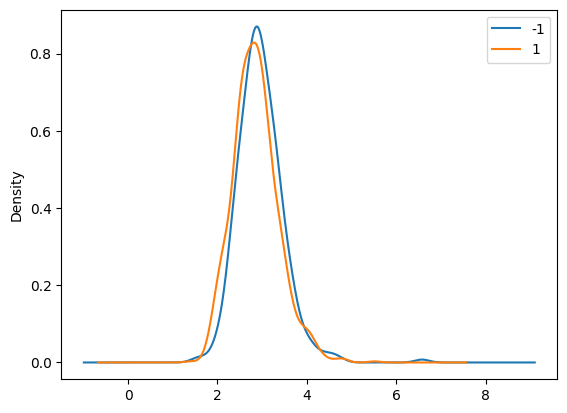

In [8]:
df.groupby("nli_flag_ent_label")['mi_mean'].plot.density()
plt.legend()

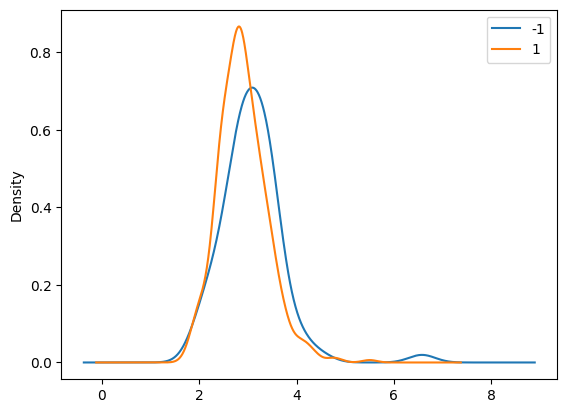

In [9]:
df.loc[:499].groupby("nli_flag_gpt_label")['mi_mean'].plot.density()
plt.legend()